<a href="https://colab.research.google.com/github/Sathvik902/Macine-Learning-model-using-sklearn/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heading

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

Data seperation as X and Y


In [ ]:
y = df['logS']
y

In [ ]:
x = df.drop("logS",axis = 1)
x

Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)




Model building - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

Applying the model


In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
print(y_lr_train_pred)

Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)



lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)


In [ ]:
lr_train_r2

0.7645051774663391

In [ ]:
lr_test_mse

1.0206953660861033

In [ ]:
lr_test_r2

0.7891616188563282

In [ ]:
lr_train_mse

1.0075362951093687

In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

lr_results.columns = ['Method','Training MSE', 'Training R2','Test MSE', 'Test R2']

In [ ]:
lr_results

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state = 100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

Making prediction with the model

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)



rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

rf_results.columns = ['Method','Training MSE', 'Training R2','Test MSE', 'Test R2']
rf_results

Combining The Tables

In [ ]:
df_models = pd.concat([lr_results,rf_results], axis = 0)
df_models

In [ ]:
df_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


Data Visualisation


Text(0.5, 0, 'Experimental Logs')

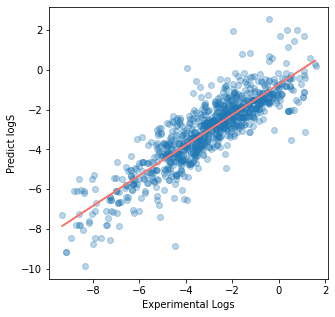

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental Logs')